## Importando Pacotes Necessários

In [111]:
# bibliotecas basicas
import numpy as np
import pandas as pd
from scipy.stats import randint, uniform

# Data Viz
import matplotlib.pyplot as plt
import seaborn as sns

# modelos
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# processamento
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, TargetEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# modelagem
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import Pipeline as PipeSMOTE
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score


# metricas
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, f1_score, recall_score, ConfusionMatrixDisplay, auc, roc_curve, roc_auc_score

#retirando os warnings
import warnings
warnings.filterwarnings('ignore')

#forçar exibição de todas as colunas
pd.set_option('display.max_columns', None)

## Verificando Dataset

In [5]:
df = pd.read_csv('data/Exam_Score_Prediction.csv', header=(0))
df.head(10)

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7
5,6,23,male,b.tech,3.48,65.4,yes,4.2,good,mixed,low,moderate,58.2
6,7,17,female,b.tech,1.35,69.0,yes,7.4,average,online videos,high,hard,53.7
7,8,22,male,b.sc,5.48,51.1,yes,8.2,poor,self-study,low,moderate,47.3
8,9,18,other,bca,2.89,92.0,yes,6.6,poor,self-study,low,easy,44.9
9,10,17,male,bba,6.77,44.8,yes,9.8,average,group study,high,moderate,77.7


In [7]:
# eliminando coluna sem informação útil
df.drop('student_id', axis=1, inplace=True)

In [11]:
df.describe()

,age,study_hours,class_attendance,sleep_hours,exam_score
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000
mean,20.473300,4.007604,70.017365,7.00856,62.513225
std,2.284458,2.308313,17.282262,1.73209,18.908491
min,17.000000,0.080000,40.600000,4.10000,19.599000
25%,18.000000,2.000000,55.100000,5.50000,48.800000
50%,20.000000,4.040000,69.900000,7.00000,62.600000
75%,22.000000,6.000000,85.000000,8.50000,76.300000
max,24.000000,7.910000,99.400000,9.90000,100.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               20000 non-null  int64  
 1   gender            20000 non-null  object 
 2   course            20000 non-null  object 
 3   study_hours       20000 non-null  float64
 4   class_attendance  20000 non-null  float64
 5   internet_access   20000 non-null  object 
 6   sleep_hours       20000 non-null  float64
 7   sleep_quality     20000 non-null  object 
 8   study_method      20000 non-null  object 
 9   facility_rating   20000 non-null  object 
 10  exam_difficulty   20000 non-null  object 
 11  exam_score        20000 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.8+ MB


In [15]:
#checando se há duplicatas entre as linhas/registros
print("Valores DUplicados:", df.duplicated().sum())

Valores DUplicados: 0


## Checando distribuição das variáveis

#### Histplot

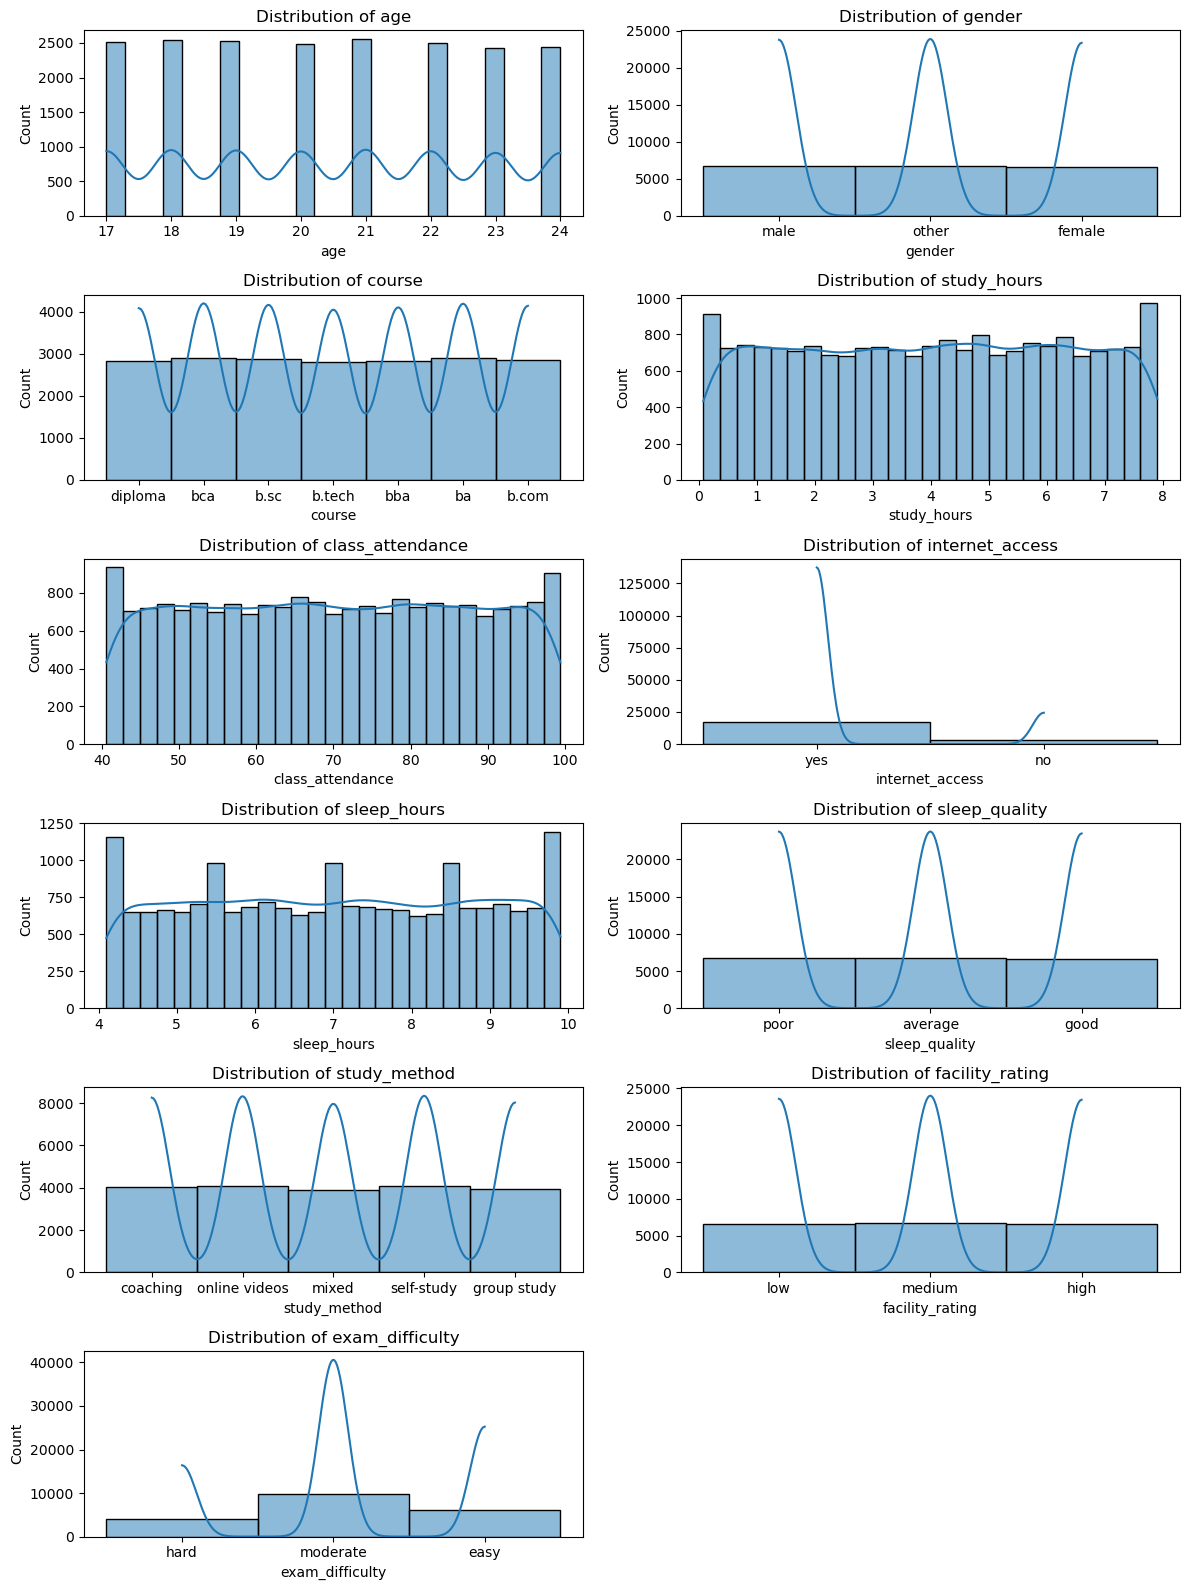

In [17]:
# estudando distribuição das variáveis com histplot
columns = df.columns.tolist()
del columns[columns.index('exam_score')]

plt.figure(figsize=(12, 16))
for i, feature in enumerate(columns):
    plt.subplot(6, 2, i+1)
    sns.histplot(data=df, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

#### Boxplot

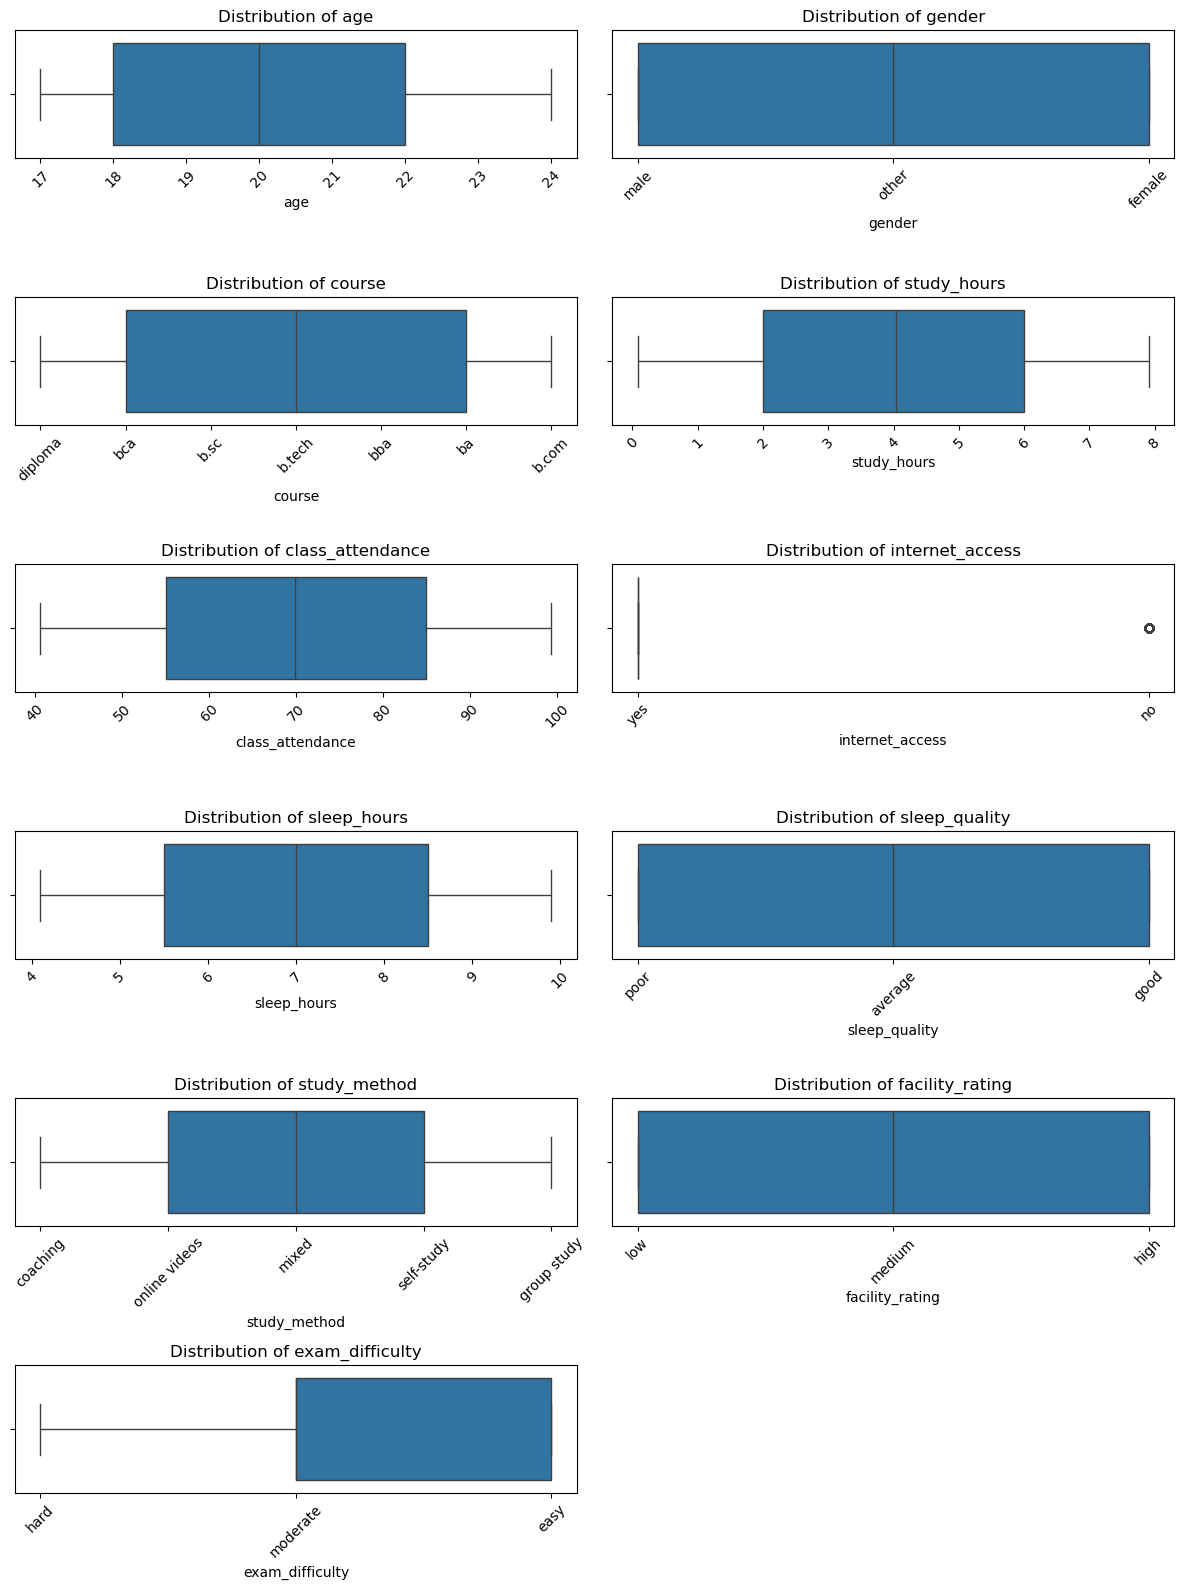

In [19]:
# Estudando as features com boxplots
columns = df.columns.tolist()
del columns[columns.index('exam_score')]

plt.figure(figsize=(12, 16))
for i, feature in enumerate(columns):
    plt.subplot(6, 2, i+1)
    sns.boxplot(data=df, x=feature)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

## Checando a Target
#### Não temos dados ausentes nem outliers

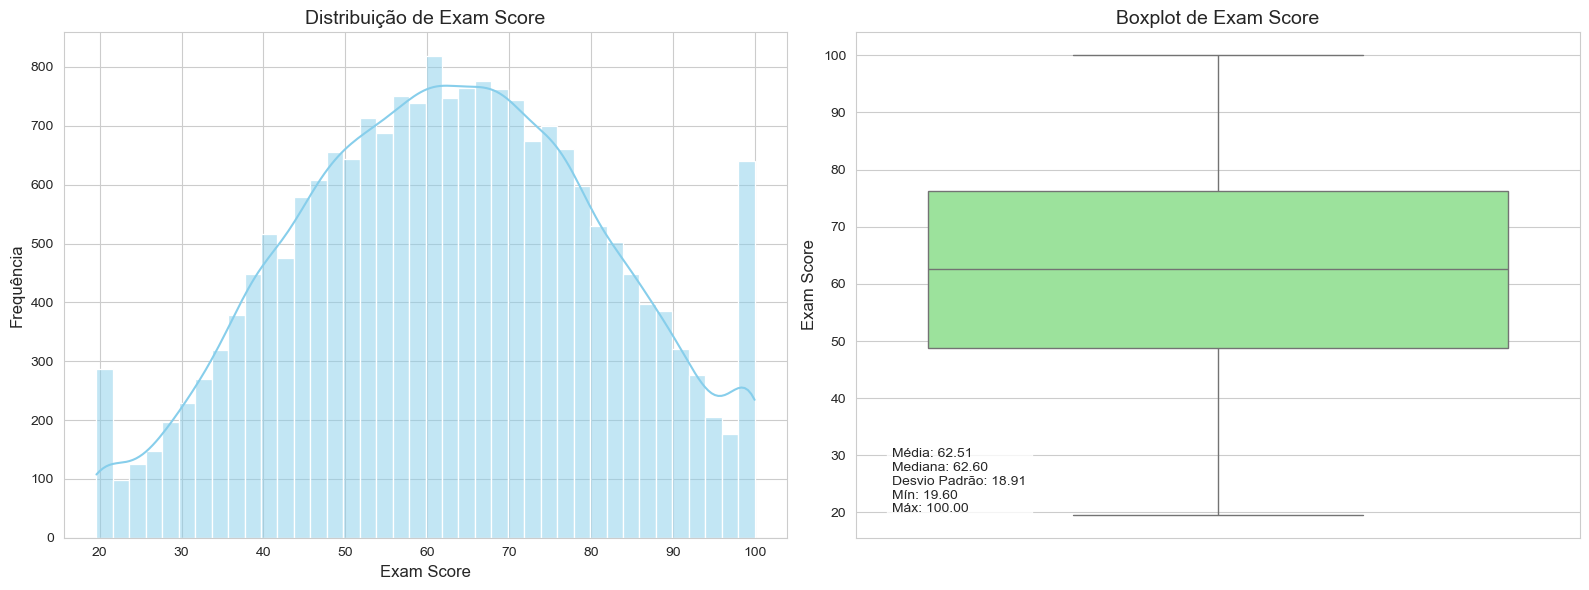

In [21]:
# Configurar o estilo do seaborn para gráficos mais bonitos
sns.set_style("whitegrid")

# Criar uma figura com dois subplots (1 linha, 2 colunas)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Subplot 1: Histograma com curva de densidade (KDE)
sns.histplot(data=df, x='exam_score', kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Distribuição de Exam Score', fontsize=14)
axes[0].set_xlabel('Exam Score', fontsize=12)
axes[0].set_ylabel('Frequência', fontsize=12)

# Subplot 2: Boxplot
sns.boxplot(y=df['exam_score'], color='lightgreen', ax=axes[1])
axes[1].set_title('Boxplot de Exam Score', fontsize=14)
axes[1].set_ylabel('Exam Score', fontsize=12)

# Adicionar estatísticas descritivas ao boxplot
stats = df['exam_score'].describe()
stat_text = f"Média: {stats['mean']:.2f}\nMediana: {stats['50%']:.2f}\nDesvio Padrão: {stats['std']:.2f}\nMín: {stats['min']:.2f}\nMáx: {stats['max']:.2f}"
axes[1].text(0.05, 0.05, stat_text, transform=axes[1].transAxes, 
             bbox=dict(facecolor='white', alpha=0.8), fontsize=10)

# Ajustar o layout
plt.tight_layout()
plt.show()

## Transformando categóricas com Encoders

In [23]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_columns:
    print(df[col].value_counts())
    print("=========================")

gender
other     6726
male      6695
female    6579
Name: count, dtype: int64
course
bca        2902
ba         2896
b.sc       2878
b.com      2864
bba        2836
diploma    2826
b.tech     2798
Name: count, dtype: int64
internet_access
yes    16988
no      3012
Name: count, dtype: int64
sleep_quality
average    6694
poor       6687
good       6619
Name: count, dtype: int64
study_method
self-study       4079
online videos    4069
coaching         4036
group study      3922
mixed            3894
Name: count, dtype: int64
facility_rating
medium    6760
low       6638
high      6602
Name: count, dtype: int64
exam_difficulty
moderate    9878
easy        6141
hard        3981
Name: count, dtype: int64


#### Variáveis nominais

In [25]:
df_encoded = pd.DataFrame(index=df.index)
df_transformed = df.copy()

# Tratando colunas nominais
nominal_columns = ['gender', 'course', 'internet_access', 'study_method']

for col in nominal_columns:
    # Aplicando OneHotEncoder para cada coluna nominal
    encoder = OneHotEncoder(drop='first', sparse_output=False)
    encoded = encoder.fit_transform(df[[col]])
    
    # Criando nomes para as novas colunas
    feature_names = encoder.get_feature_names_out([col])
    
    # Adicionando as colunas codificadas ao DataFrame
    temp_df = pd.DataFrame(encoded, columns=feature_names, index=df.index)
    df_encoded = pd.concat([df_encoded, temp_df], axis=1)
    
    # Removendo a coluna original
    df_transformed = df_transformed.drop(col, axis=1)

# Combinando as colunas transformadas com as colunas codificadas
df_sem_nominais = pd.concat([df_transformed, df_encoded], axis=1)

# Exibindo o DataFrame final
df_sem_nominais

,age,study_hours,class_attendance,sleep_hours,sleep_quality,facility_rating,exam_difficulty,exam_score,gender_male,gender_other,course_b.sc,course_b.tech,course_ba,course_bba,course_bca,course_diploma,internet_access_yes,study_method_group study,study_method_mixed,study_method_online videos,study_method_self-study
0,17,2.78,92.9,7.4,poor,low,hard,58.9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,23,3.37,64.8,4.6,average,medium,moderate,54.8,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,22,7.88,76.8,8.5,poor,high,moderate,90.3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,20,0.67,48.4,5.8,average,low,moderate,29.7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,20,0.89,71.6,9.8,poor,low,moderate,43.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,18,6.50,71.3,5.0,good,low,easy,86.5,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
19996,18,3.71,41.6,5.9,average,medium,moderate,60.9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19997,19,7.88,68.2,4.6,poor,low,easy,64.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
19998,19,4.60,76.3,6.1,good,medium,moderate,79.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


#### Variáveis ordinais

In [27]:
df_numerico= df_sem_nominais.copy()

# Definindo as colunas para aplicar Ordinal Encoding
ordinal_columns = ['sleep_quality', 'facility_rating', 'exam_difficulty']

ordinal_encoder = OrdinalEncoder()
df_numerico[ordinal_columns] = ordinal_encoder.fit_transform(df_sem_nominais[ordinal_columns])

# Exibindo o DataFrame transformado
df_numerico

,age,study_hours,class_attendance,sleep_hours,sleep_quality,facility_rating,exam_difficulty,exam_score,gender_male,gender_other,course_b.sc,course_b.tech,course_ba,course_bba,course_bca,course_diploma,internet_access_yes,study_method_group study,study_method_mixed,study_method_online videos,study_method_self-study
0,17,2.78,92.9,7.4,2.0,1.0,1.0,58.9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,23,3.37,64.8,4.6,0.0,2.0,2.0,54.8,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,22,7.88,76.8,8.5,2.0,0.0,2.0,90.3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,20,0.67,48.4,5.8,0.0,1.0,2.0,29.7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,20,0.89,71.6,9.8,2.0,1.0,2.0,43.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,18,6.50,71.3,5.0,1.0,1.0,0.0,86.5,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
19996,18,3.71,41.6,5.9,0.0,2.0,2.0,60.9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19997,19,7.88,68.2,4.6,2.0,1.0,0.0,64.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
19998,19,4.60,76.3,6.1,1.0,2.0,2.0,79.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Analisando correlação

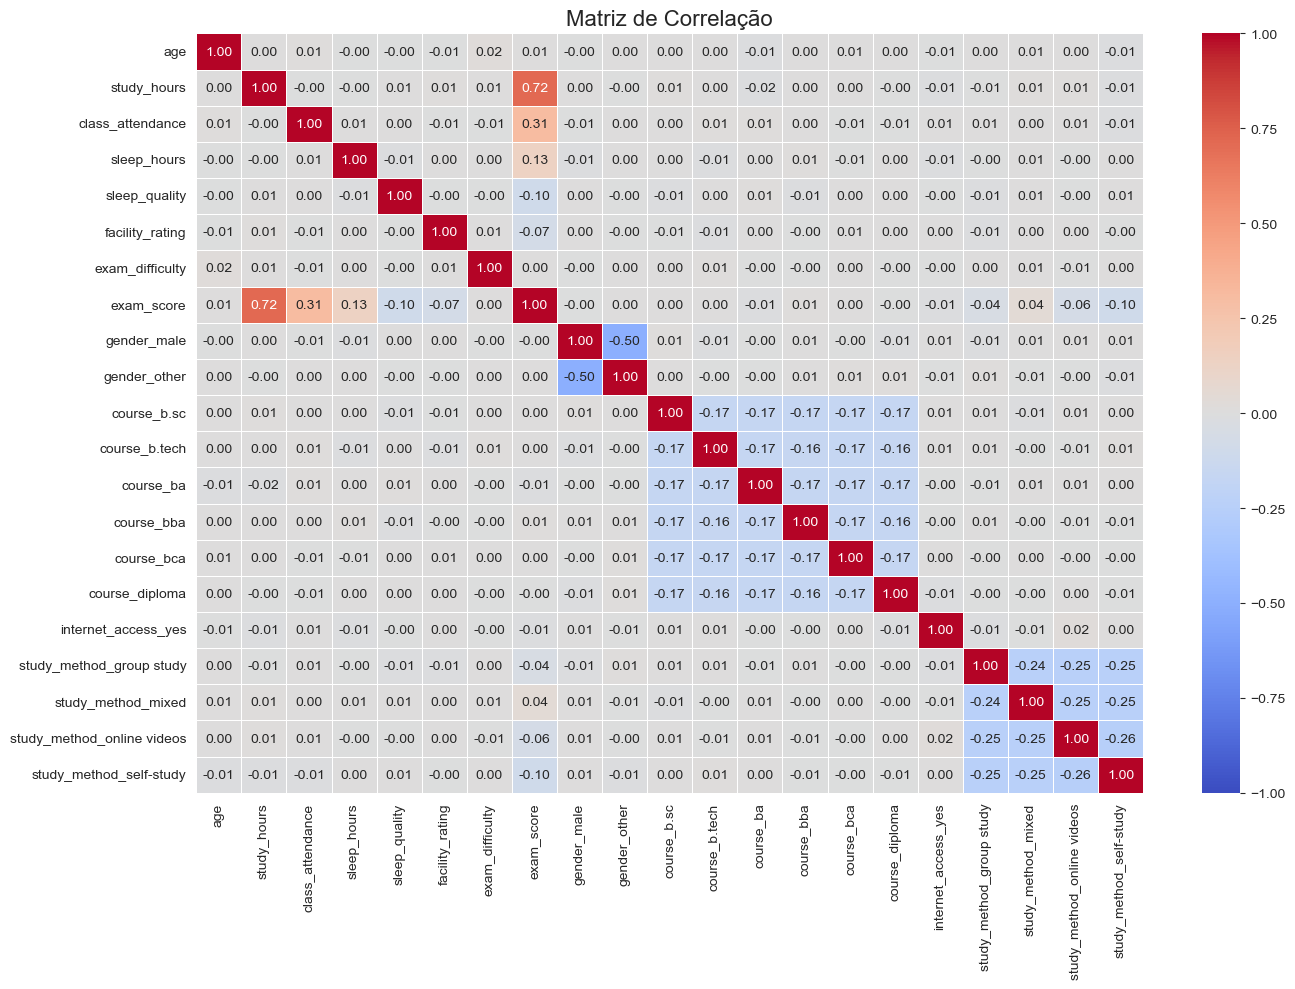

In [29]:
# Calculando a matriz de correlação
correlation_matrix = df_numerico.corr()

# Configurando o tamanho da figura
plt.figure(figsize=(14, 10))

# Criando o heatmap
sns.heatmap(correlation_matrix, 
            annot=True,           # Mostra os valores de correlação
            cmap='coolwarm',      # Esquema de cores
            fmt='.2f',            # Formato dos números (2 casas decimais)
            linewidths=0.5,       # Largura das linhas entre células
            vmin=-1, vmax=1)      # Limites dos valores

plt.title('Matriz de Correlação', fontsize=16)
plt.tight_layout()
plt.show()

#### Métricas Estatísticas de cada feature

In [31]:
df_numerico.describe()

,age,study_hours,class_attendance,sleep_hours,sleep_quality,facility_rating,exam_difficulty,exam_score,gender_male,gender_other,course_b.sc,course_b.tech,course_ba,course_bba,course_bca,course_diploma,internet_access_yes,study_method_group study,study_method_mixed,study_method_online videos,study_method_self-study
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,20.473300,4.007604,70.017365,7.00856,0.999650,1.007900,1.186850,62.513225,0.334750,0.336300,0.143900,0.139900,0.144800,0.141800,0.14510,0.141300,0.849400,0.196100,0.194700,0.203450,0.203950
std,2.284458,2.308313,17.282262,1.73209,0.817975,0.817356,0.875257,18.908491,0.471915,0.472455,0.350997,0.346892,0.351908,0.348854,0.35221,0.348339,0.357667,0.397055,0.395979,0.402574,0.402942
min,17.000000,0.080000,40.600000,4.10000,0.000000,0.000000,0.000000,19.599000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,55.100000,5.50000,0.000000,0.000000,0.000000,48.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,20.000000,4.040000,69.900000,7.00000,1.000000,1.000000,1.000000,62.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,22.000000,6.000000,85.000000,8.50000,2.000000,2.000000,2.000000,76.300000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,24.000000,7.910000,99.400000,9.90000,2.000000,2.000000,2.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Ajustando escalas

In [33]:
# Definindo os grupos de colunas
standard_scale_cols = ['age', 'study_hours', 'sleep_hours']
minmax_scale_cols = ['class_attendance', 'sleep_quality', 'facility_rating', 'exam_difficulty']

# Criando o transformador de colunas
preprocessor = ColumnTransformer(
    transformers=[
        ('std_scaler', StandardScaler(), standard_scale_cols),
        ('minmax_scaler', MinMaxScaler(), minmax_scale_cols),
    ],
    remainder='passthrough'  # Mantém outras colunas inalteradas
)

# Aplicando as transformações
array_escalonado = preprocessor.fit_transform(df_numerico)
df_pronto = pd.DataFrame(array_escalonado, index = df_numerico.index, columns = list(df_numerico.columns))
df_pronto

,age,study_hours,class_attendance,sleep_hours,sleep_quality,facility_rating,exam_difficulty,exam_score,gender_male,gender_other,course_b.sc,course_b.tech,course_ba,course_bba,course_bca,course_diploma,internet_access_yes,study_method_group study,study_method_mixed,study_method_online videos,study_method_self-study
0,-1.520442,-0.531832,0.225999,0.889456,1.0,0.5,0.5,58.9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,1.106067,-0.276227,-1.390586,0.411565,0.0,1.0,1.0,54.8,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.668315,1.677629,0.861085,0.615646,1.0,0.0,1.0,90.3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-0.207188,-1.445942,-0.697764,0.132653,0.0,0.5,1.0,29.7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,-0.207188,-1.350632,1.611643,0.527211,1.0,0.5,1.0,43.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-1.082691,1.079775,-1.159646,0.522109,0.5,0.5,0.0,86.5,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
19996,-1.082691,-0.128930,-0.640029,0.017007,0.0,1.0,1.0,60.9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19997,-0.644939,1.677629,-1.390586,0.469388,1.0,0.5,0.0,64.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
19998,-0.644939,0.256643,-0.524559,0.607143,0.5,1.0,1.0,79.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


#### Verificando se algo se alterou

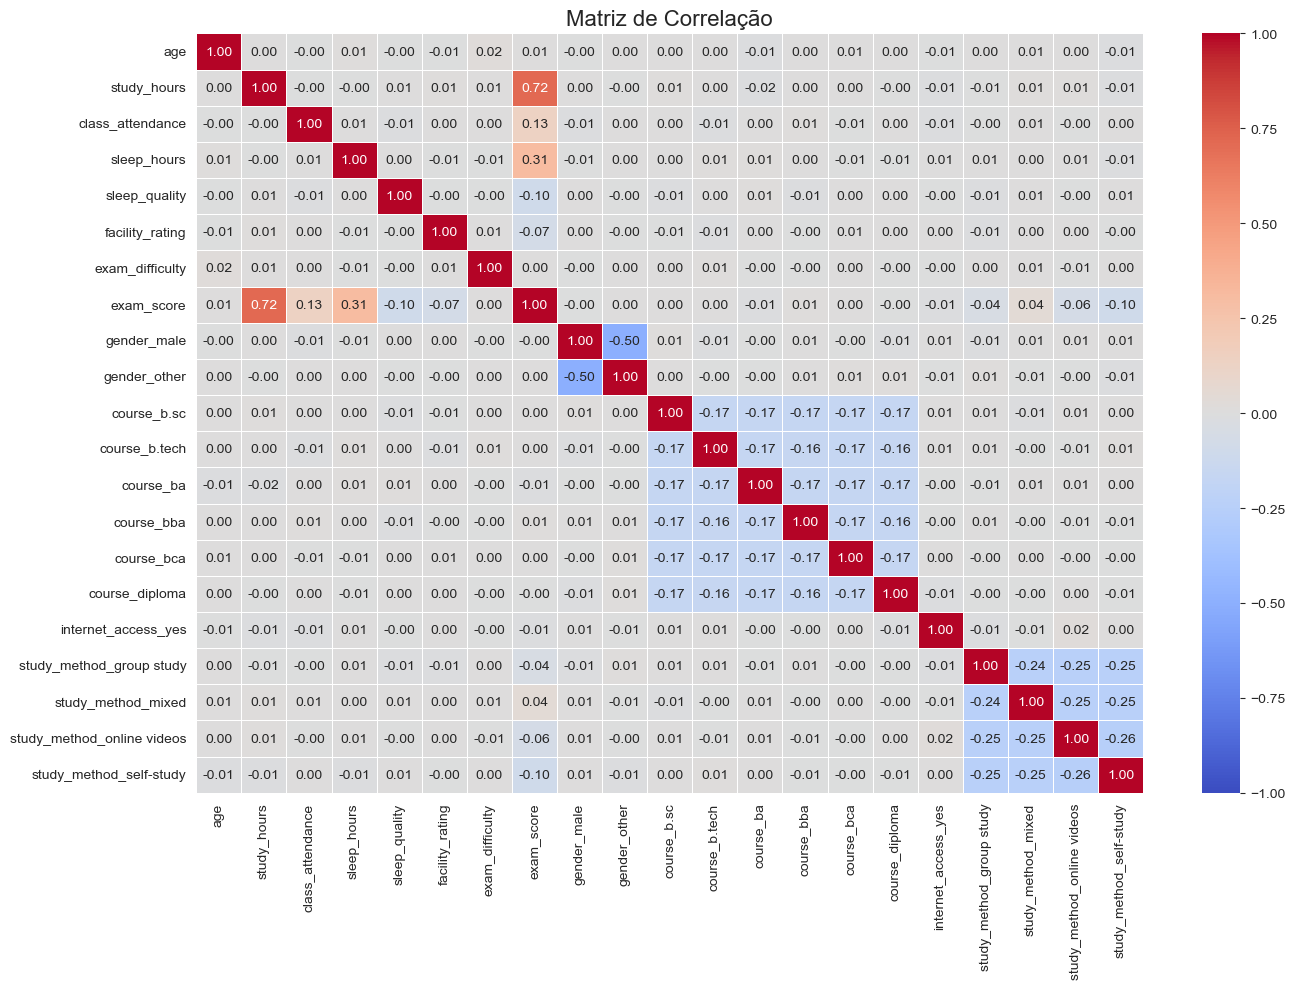

In [35]:
# Calculando a matriz de correlação
correlation_matrix = df_pronto.corr()

# Configurando o tamanho da figura
plt.figure(figsize=(14, 10))

# Criando o heatmap
sns.heatmap(correlation_matrix, 
            annot=True,           # Mostra os valores de correlação
            cmap='coolwarm',      # Esquema de cores
            fmt='.2f',            # Formato dos números (2 casas decimais)
            linewidths=0.5,       # Largura das linhas entre células
            vmin=-1, vmax=1)      # Limites dos valores

plt.title('Matriz de Correlação', fontsize=16)
plt.tight_layout()
plt.show()

## Regressão Linear

#### Métricas

In [37]:
# Separando features (X) e target (y)
X = df_pronto.drop('exam_score', axis=1)  
X2 = df_numerico.drop('exam_score', axis=1) 
y = df_pronto['exam_score']              
y2 = df_numerico['exam_score']   

# Dividir em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)


# Criar e treinar o modelo
lr = LinearRegression()
lr2 = LinearRegression()
lr.fit(X_train, y_train)
lr2.fit(X2_train, y2_train)

# Fazer previsões
y_pred = lr.predict(X_test)
y2_pred = lr2.predict(X2_test)

# Avaliar o modelo
mae = mean_absolute_error(y_test, y_pred)
mae2 = mean_absolute_error(y2_test, y2_pred)
rmse = root_mean_squared_error(y_test, y_pred)
rmse2 = root_mean_squared_error(y2_test, y2_pred)
r2 = r2_score(y_test, y_pred)
r22 = r2_score(y2_test, y2_pred)

print('Com ajuste de escala \n')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'Root Mean Squared Error: {rmse:.4f}')
print(f'R² Score: {r2:.4f}')
print('==============================')
print('Sem ajuste de escala \n')
print(f'Mean Absolute Error2: {mae2:.4f}')
print(f'Root Mean Squared Error2: {rmse2:.4f}')
print(f'R² Score2: {r22:.4f}')

Com ajuste de escala 

Mean Absolute Error: 8.6565
Root Mean Squared Error: 10.7294
R² Score: 0.6782
Sem ajuste de escala 

Mean Absolute Error2: 8.6565
Root Mean Squared Error2: 10.7294
R² Score2: 0.6782


#### Importância das Features

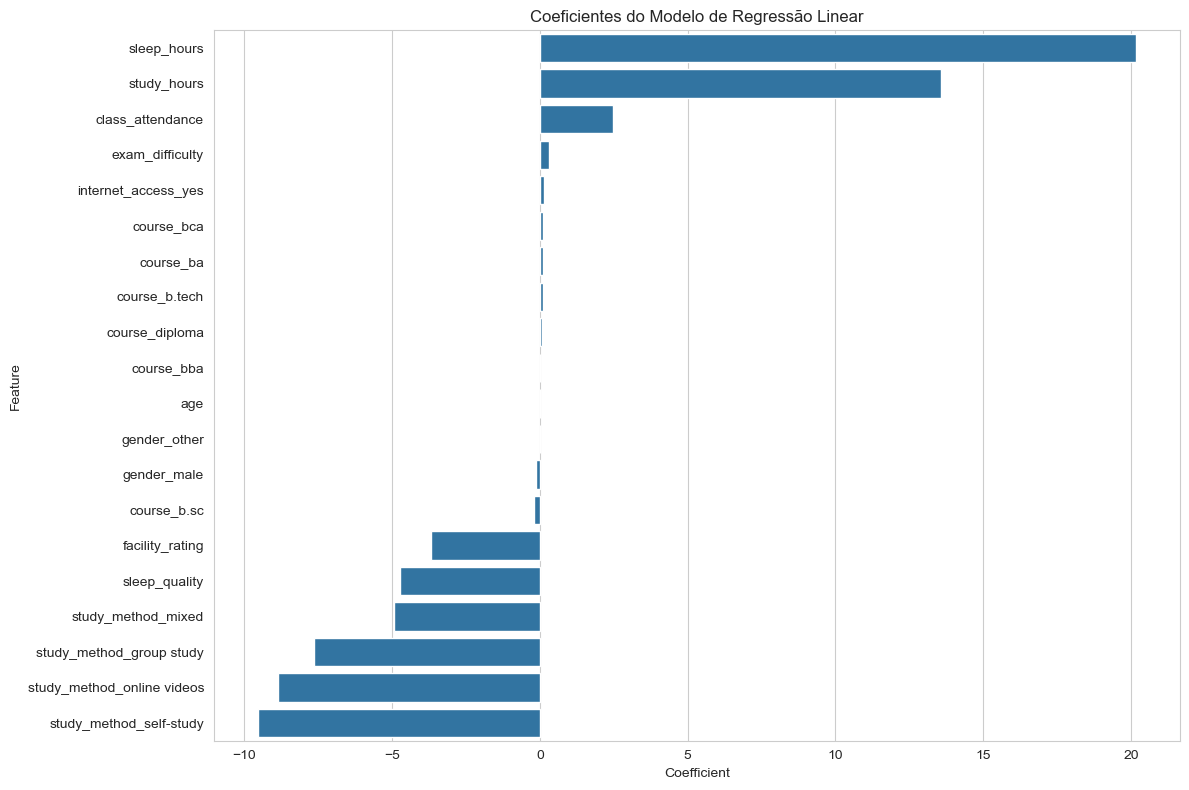

In [39]:
# Visualizar coeficientes (importância das features)
coef = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=coef)
plt.title('Coeficientes do Modelo de Regressão Linear')
plt.tight_layout()
plt.show()

## Visualizações do modelo

#### Auste da Reta

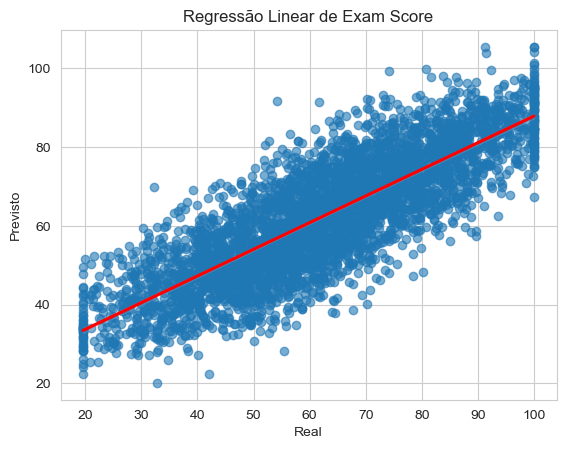

In [47]:
sns.regplot(
    x=y_test,
    y=y_pred,
    data=df_pronto,
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red'}
)

plt.title('Regressão Linear de Exam Score')
plt.xlabel('Real')
plt.ylabel('Previsto')
plt.show()

#### Erros

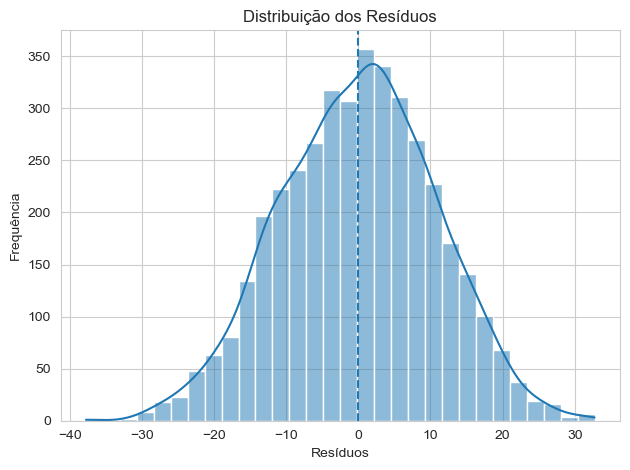

In [51]:
residuos = y_test - y_pred

sns.histplot(
    residuos,
    kde=True,
    bins=30       
)

plt.axvline(0, linestyle='--') 
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Distribuição dos Resíduos')

plt.tight_layout()
plt.show()

### Excluindo features com importancia baixa

In [207]:
#colunas_a_remover = ['exam_difficulty', 'internet_access_yes', 'course_bca', 'course_ba', 'course_b.tech', 'course_diploma', 'course_bba', 'age', 'gender_other', 'gender_male', 'course_b.sc']
df_limpo = df_pronto.drop(columns=colunas_a_remover)
df_limpo

,study_hours,class_attendance,sleep_hours,sleep_quality,facility_rating,exam_score,study_method_group study,study_method_mixed,study_method_online videos,study_method_self-study
0,-0.531832,0.225999,0.889456,1.0,0.5,58.9,0.0,0.0,0.0,0.0
1,-0.276227,-1.390586,0.411565,0.0,1.0,54.8,0.0,0.0,1.0,0.0
2,1.677629,0.861085,0.615646,1.0,0.0,90.3,0.0,0.0,0.0,0.0
3,-1.445942,-0.697764,0.132653,0.0,0.5,29.7,0.0,0.0,1.0,0.0
4,-1.350632,1.611643,0.527211,1.0,0.5,43.7,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
19995,1.079775,-1.159646,0.522109,0.5,0.5,86.5,0.0,0.0,0.0,1.0
19996,-0.128930,-0.640029,0.017007,0.0,1.0,60.9,0.0,0.0,0.0,0.0
19997,1.677629,-1.390586,0.469388,1.0,0.5,64.5,1.0,0.0,0.0,0.0
19998,0.256643,-0.524559,0.607143,0.5,1.0,79.0,0.0,0.0,0.0,1.0


In [209]:
# Separando features (X) e target (y)
X = df_limpo.drop('exam_score', axis=1)  
y = df_limpo['exam_score']              

# Dividir em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciar e treinar o modelo
lr = LinearRegression()
lr.fit(X_train, y_train)

# Fazer previsões
y_pred = lr.predict(X_test)

# Avaliar o modelo
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae:.4f}')
print(f'Root Mean Squared Error: {rmse:.4f}')
print(f'R² Score: {r2:.4f}')

Mean Absolute Error: 8.6510
Root Mean Squared Error: 10.7224
R² Score: 0.6786


## Tentando uma Regularização

In [58]:
X = df_pronto.drop(columns='exam_score')
y = df_pronto['exam_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Ridge(alpha=1.0))
])

lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Lasso(alpha=0.1))
])

ridge_pipeline.fit(X_train, y_train)
lasso_pipeline.fit(X_train, y_train)

y_pred_ridge = ridge_pipeline.predict(X_test)
y_pred_lasso = lasso_pipeline.predict(X_test)

print("Ridge R²:", r2_score(y_test, y_pred_ridge))
print("Ridge Root Mean Squared Error:", root_mean_squared_error(y_test, y_pred_ridge))
print("Ridge Mean Absolute Error:", mean_absolute_error(y_test, y_pred_ridge))
print("==============================================")
print("Lasso R²:", r2_score(y_test, y_pred_lasso))
print("Lasso Root Mean Squared Error:", root_mean_squared_error(y_test, y_pred_lasso))
print("Lasso Mean Absolute Error:", mean_absolute_error(y_test, y_pred_lasso))

Ridge R²: 0.678162489298073
Ridge Root Mean Squared Error: 10.72941367461318
Ridge Mean Absolute Error: 8.656586234906035
Lasso R²: 0.6782277046855362
Lasso Root Mean Squared Error: 10.7283265447769
Lasso Mean Absolute Error: 8.667286339810248


## Classificação KNN

#### preparando dataset

In [143]:
df_knn = pd.read_csv('data/Exam_Score_Prediction.csv', header=(0))
df_knn.drop('student_id', axis=1, inplace=True)

#### Transformando a target em categorica

In [145]:
df_knn['aprovacao'] = (df_knn['exam_score'] >= 70.0).astype(int)
df_knn.drop(columns=['exam_score'], inplace=True)
df_knn

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,aprovacao
0,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,0
1,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,0
2,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,1
3,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,0
4,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,18,other,bba,6.50,71.3,yes,5.0,good,self-study,low,easy,1
19996,18,male,b.com,3.71,41.6,no,5.9,average,coaching,medium,moderate,0
19997,19,other,diploma,7.88,68.2,yes,4.6,poor,group study,low,easy,0
19998,19,male,bba,4.60,76.3,no,6.1,good,self-study,medium,moderate,1


In [147]:
#Definindo a target
X = df_knn.drop(columns="aprovacao")
y = df_knn["aprovacao"]

#### Split

In [151]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

#### Transformando Colunas

In [153]:
# Features Numéricas
num_features = ['age', 'study_hours', 'class_attendance', 'sleep_hours']

# Features Categóricas
cat_onehot_features = ['gender', 'course', 'internet_access', 'study_method']
cat_ordinal_features = ['sleep_quality', 'facility_rating', 'exam_difficulty']

# Encoders + Scalers
num_std_pipeline = Pipeline(steps=[('scaler', StandardScaler())])
cat_onehot_pipeline = Pipeline(steps=[('encoder', OneHotEncoder(handle_unknown='ignore'))])
cat_ordinal_pipeline = Pipeline(steps=[('encoder', OrdinalEncoder(categories=[
    ['poor', 'average', 'good'],
    ['low', 'medium', 'high'],
    ['easy', 'moderate', 'hard']
]))])

#preprocessamento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_std_pipeline, num_features),
        ('cat_onehot', cat_onehot_pipeline, cat_onehot_features),
        ('cat_ordinal', cat_ordinal_pipeline, cat_ordinal_features)
    ],
    remainder='drop'
)

#### Pipeline

In [155]:
# verificando o desbalanceamento da target
df_knn['aprovacao']. value_counts()

aprovacao
0    12783
1     7217
Name: count, dtype: int64

In [157]:
# Pipeline
pipeline = PipeSMOTE(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('pca', PCA(n_components=8)),  
    ('knn', KNeighborsClassifier(
        n_neighbors=5,
        weights='distance',
        metric='euclidean'
    ))
])

#### Validação Cruzada

In [165]:
scores = cross_validate(
    estimator=pipeline,
    X=X,
    y=y,
    cv=cv,
    scoring={
        'accuracy': 'accuracy',
        'precision': 'precision',
        'recall': 'recall',
        'f1': 'f1'
    },
    n_jobs=-1,
    return_train_score=False
)

for metric in scores:
    print(metric, scores[metric].mean())

fit_time 0.6990300019582113
score_time 0.5908969243367513
test_accuracy 0.7905998264443213
test_precision 0.6815440176520496
test_recall 0.7878620611787693
test_f1 0.7308416981243481


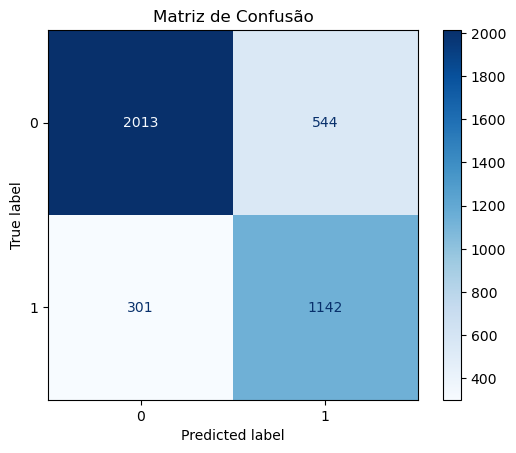

In [173]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=pipeline.classes_
)

disp.plot(cmap='Blues')
plt.title('Matriz de Confusão')
plt.show()

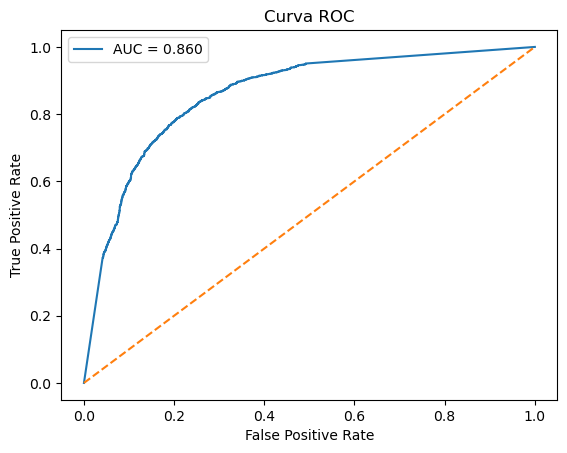

In [175]:
y_proba = pipeline.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {auc:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend()
plt.show()

## Classificação Random Forest

#### Preparando o dataset

In [187]:
df_rf = pd.read_csv('data/Exam_Score_Prediction.csv', header=(0))
df_rf.drop('student_id', axis=1, inplace=True)
df_rf['aprovacao'] = (df_rf['exam_score'] >= 70.0).astype(int)
df_rf.drop(columns=['exam_score'], inplace=True)

#### Split

In [189]:
#Definindo a target
X = df_rf.drop(columns="aprovacao")
y = df_rf["aprovacao"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

#### Transformando Colunas

In [191]:
# Features Numéricas
num_features = ['age', 'study_hours', 'class_attendance', 'sleep_hours']

# Features Categóricas
cat_onehot_features = ['gender', 'course', 'internet_access', 'study_method']
cat_ordinal_features = ['sleep_quality', 'facility_rating', 'exam_difficulty']

# Encoders + Scalers
num_std_pipeline = Pipeline(steps=[('scaler', StandardScaler())])
cat_onehot_pipeline = Pipeline(steps=[('encoder', OneHotEncoder(handle_unknown='ignore'))])
cat_ordinal_pipeline = Pipeline(steps=[('encoder', OrdinalEncoder(categories=[
    ['poor', 'average', 'good'],
    ['low', 'medium', 'high'],
    ['easy', 'moderate', 'hard']
]))])

#preprocessamento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_std_pipeline, num_features),
        ('cat_onehot', cat_onehot_pipeline, cat_onehot_features),
        ('cat_ordinal', cat_ordinal_pipeline, cat_ordinal_features)
    ],
    remainder='drop'
)

#### Pipeline

In [193]:
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA()),
    ('model', RandomForestClassifier(
        random_state=42,
        class_weight='balanced'  # O balanceamento é feito pelo próprio modelo?
    ))
])

In [195]:
# Espaço de Parâmetros
param_distributions = {
    'pca__n_components': [0.80, 0.90, 0.95],
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 5, 10, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['sqrt', 'log2']
}

#### Cross Validation

In [198]:
rf_search = RandomizedSearchCV(
    estimator=rf_pipeline,
    param_distributions=param_distributions,
    n_iter=20,                
    scoring='roc_auc',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

rf_search.fit(X_train, y_train)

print("Melhores hiperparâmetros:")
print(rf_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Melhores hiperparâmetros:
{'pca__n_components': 0.95, 'model__n_estimators': 200, 'model__min_samples_split': 5, 'model__min_samples_leaf': 4, 'model__max_features': 'log2', 'model__max_depth': 20}


#### Avaliação de Métricas

In [204]:
# Melhor Modelo
rf_model = rf_search.best_estimator_

# Predição
y_pred = rf_model.predict(X_test)
print(classification_report(
    y_test,
    y_pred,
    target_names=["Reprovado", "Aprovado"]
))

              precision    recall  f1-score   support

   Reprovado       0.88      0.86      0.87      2557
    Aprovado       0.76      0.79      0.78      1443

    accuracy                           0.83      4000
   macro avg       0.82      0.83      0.82      4000
weighted avg       0.84      0.83      0.84      4000



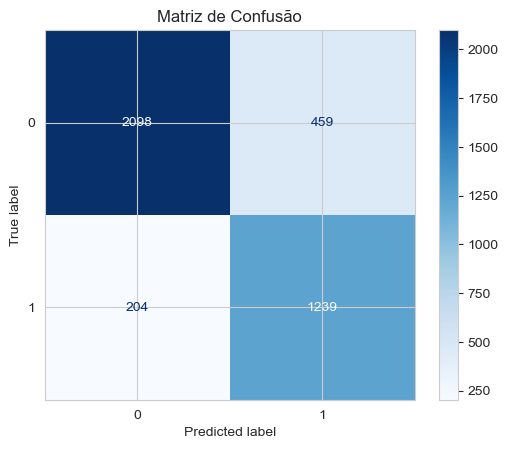

In [295]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=rf_model.classes_
)

disp.plot(cmap='Blues')
plt.title('Matriz de Confusão')
plt.show()

#### Curva ROC

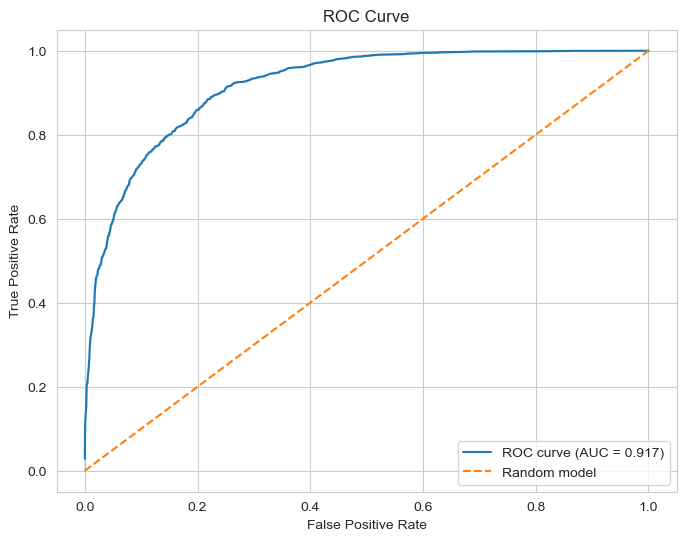

In [209]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

sns.set_style("whitegrid")

plt.figure(figsize=(8, 6))

sns.lineplot(x=fpr, y=tpr, label=f"ROC curve (AUC = {roc_auc:.3f})")

# Linha de referência (modelo aleatório)
plt.plot([0, 1], [0, 1], linestyle="--", label="Random model")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

## Classificação CATBOOST

#### Preparando o Dataset

In [268]:
df_catb = pd.read_csv('data/Exam_Score_Prediction.csv', header=(0))
df_catb.drop('student_id', axis=1, inplace=True)
df_catb['aprovacao'] = (df_catb['exam_score'] >= 70.0).astype(int)
df_catb.drop(columns=['exam_score'], inplace=True)

#### Tratando categóricas

In [270]:
sleep_quality_map = {
    'poor': 1,
    'average': 2,
    'good': 3,
}

facility_rating_map = {
    'low': 1,
    'medium': 2,
    'high': 3,
}

exam_difficulty_map = {
    'easy': 1,
    'moderate': 2,
    'hard': 3
}

df_catb['sleep_quality'] = df_catb['sleep_quality'].map(sleep_quality_map)
df_catb['facility_rating'] = df_catb['facility_rating'].map(facility_rating_map)
df_catb['exam_difficulty'] = df_catb['exam_difficulty'].map(exam_difficulty_map)

In [272]:
# Definindo Features Categóricas
cat_nominais = [
    'gender',
    'course',
    'internet_access',
    'study_method'
]

cat_features = [
    X.columns.get_loc(col)
    for col in cat_nominais
]

#### Split

In [274]:
X = df_catb.drop(columns='aprovacao')
y = df_catb['aprovacao']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

#### Cross Validation

In [276]:
param_dist = {
    'depth': [4, 5, 6, 7],
    'learning_rate': [0.03, 0.05, 0.1],
    'iterations': [300, 500, 700],
    'l2_leaf_reg': [1, 3, 5, 7]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#### Treinamento

In [282]:
cat_model = CatBoostClassifier(
    loss_function='Logloss',
    eval_metric='AUC',
    iterations=500,
    depth=6,
    learning_rate=0.05,
    l2_leaf_reg=3,
    random_seed=42,
    verbose=0,
    auto_class_weights='Balanced' # Balanceamento da Target
)

random_search = RandomizedSearchCV(
    estimator=cat_model,
    param_distributions=param_dist,
    n_iter=20,
    scoring='roc_auc',
    cv=cv,
    
    n_jobs=-1,
    verbose=1,
    random_state=42
    [
)

random_search.fit(
    X_train,
    y_train,
    cat_features=cat_features
)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=<catboost.core.CatBoostClassifier object at 0x0000020067710CB0>,
                   n_iter=20, n_jobs=-1,
                   param_distributions={'depth': [4, 5, 6, 7],
                                        'iterations': [300, 500, 700],
                                        'l2_leaf_reg': [1, 3, 5, 7],
                                        'learning_rate': [0.03, 0.05, 0.1]},
                   random_state=42, scoring='roc_auc', verbose=1)

#### Avaliação de Métricas

In [284]:
catboost_model = random_search.best_estimator_
print(random_search.best_params_)

y_pred = catboost_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

{'learning_rate': 0.03, 'l2_leaf_reg': 5, 'iterations': 500, 'depth': 4}
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.82      0.86      2557
           1       0.73      0.86      0.79      1443

    accuracy                           0.83      4000
   macro avg       0.82      0.84      0.83      4000
weighted avg       0.85      0.83      0.84      4000



In [289]:
y_pred_proba = catboost_model.predict_proba(X_test)[:, 1]
print(f"ROC AUC: {roc_auc:.4f}")

ROC AUC: 0.9175


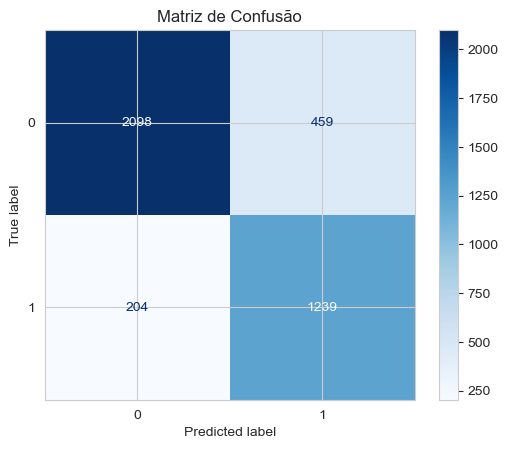

In [293]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=catboost_model.classes_
)

disp.plot(cmap='Blues')
plt.title('Matriz de Confusão')
plt.show()

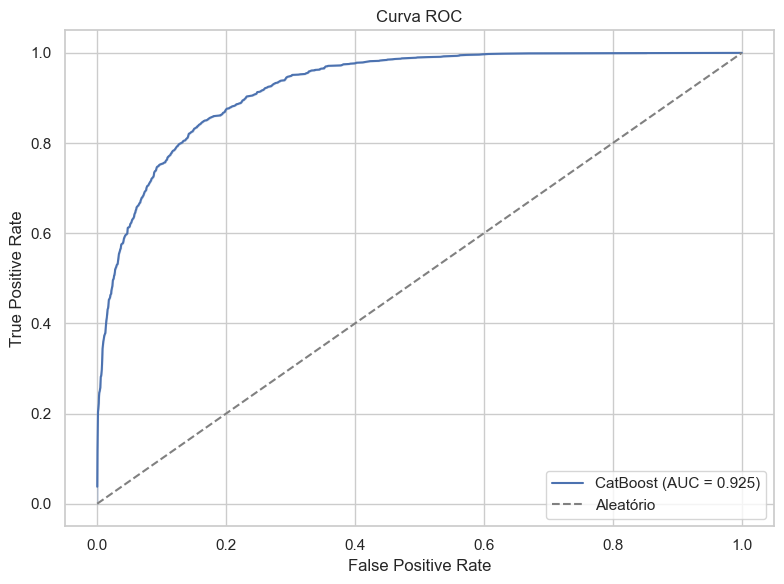

In [297]:

sns.set_theme(style="whitegrid", context="notebook")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

roc_df = pd.DataFrame({
    'False Positive Rate': fpr,
    'True Positive Rate': tpr
})

plt.figure(figsize=(8, 6))

sns.lineplot(
    data=roc_df,
    x='False Positive Rate',
    y='True Positive Rate',
    label=f'CatBoost (AUC = {roc_auc:.3f})'
)

# Linha de referência (modelo aleatório)
sns.lineplot(
    x=[0, 1],
    y=[0, 1],
    linestyle='--',
    color='gray',
    label='Aleatório'
)

plt.title('Curva ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.tight_layout()
plt.show()

In [299]:
feature_importances = catboost_model.get_feature_importance(prettified=True)
print(feature_importances)

          Feature Id  Importances
0        study_hours    52.774595
1   class_attendance    19.981295
2      sleep_quality     8.815365
3    facility_rating     6.881375
4       study_method     6.167927
5        sleep_hours     4.190150
6             gender     0.418709
7             course     0.329641
8                age     0.197576
9    exam_difficulty     0.194951
10   internet_access     0.048415
